In [3]:
import polars as pl
import numpy as np


df = pl.read_csv("spectral_indices.csv")

# filter bands column to only include bands in N R G B NR2 nothing else
filtered = df.filter(
    pl.col("bands").str.contains(r"^\['(?:N|R|G|B|NR2)'(?:,\s*'(?:N|R|G|B|NR2)')*\]$")
)

band_mapping = {"B": "band1", "G": "band2", "R": "band3",  "NR2": "band4","N": "band5"}

filtered = df.filter(
    pl.col("bands").str.contains(r"^\['(?:N|R|G|B|NR2)'(?:,\s*'(?:N|R|G|B|NR2)')*\]$")
)

filtered = (
    filtered
    .with_columns(
        pl.col("bands")
        .str.replace(r"\bNR2\b", "band4")
        .str.replace(r"\bN\b", "band5")
        .str.replace(r"\bB\b", "band1")
        .str.replace(r"\bG\b", "band2")
        .str.replace(r"\bR\b", "band3")
        .alias("bands"),
        pl.col("formula")
        .str.replace(r"\bNR2\b", "band4")
        .str.replace(r"\bN\b", "band5")
        .str.replace(r"\bB\b", "band1")
        .str.replace(r"\bG\b", "band2")
        .str.replace(r"\bR\b", "band3")
        .alias("formula"),
    )
)


filtered

index,short_name,long_name,application_domain,formula,bands,reference,contributor,date_of_addition
i64,str,str,str,str,str,str,str,str
7,"""AVI""","""Advanced Vegetation Index""","""vegetation""","""(band5 * (1.0 - band3) * (N - …","""['band5', 'band3']""","""http://citeseerx.ist.psu.edu/v…","""https://github.com/davemlz""","""2022-04-08"""
13,"""BCC""","""Blue Chromatic Coordinate""","""vegetation""","""band1 / (band3 + band2 + B)""","""['band1', 'band3', 'band2']""","""https://doi.org/10.1016/0034-4…","""https://github.com/davemlz""","""2022-01-17"""
18,"""BNDVI""","""Blue Normalized Difference Veg…","""vegetation""","""(band5 - band1)/(N + B)""","""['band5', 'band1']""","""https://doi.org/10.1016/S1672-…","""https://github.com/MATRIX4284""","""2021-04-07"""
23,"""CIG""","""Chlorophyll Index Green""","""vegetation""","""(band5 / band2) - 1.0""","""['band5', 'band2']""","""https://doi.org/10.1078/0176-1…","""https://github.com/davemlz""","""2021-04-07"""
25,"""CRI550""","""Carotenoid Reflectance Index u…","""vegetation""","""(1.0 / band1) - (1.0 / band2)""","""['band1', 'band2']""","""https://doi.org/10.1562/0031-8…","""https://github.com/eomasters-r…","""2024-08-08"""
…,…,…,…,…,…,…,…,…
216,"""TVI""","""Transformed Vegetation Index""","""vegetation""","""(((band5 - band3)/(N + R)) + 0…","""['band5', 'band3']""","""https://ntrs.nasa.gov/citation…","""https://github.com/davemlz""","""2022-04-08"""
218,"""TriVI""","""Triangular Vegetation Index""","""vegetation""","""0.5 * (120 * (band5 - band2) -…","""['band5', 'band2', 'band3']""","""http://dx.doi.org/10.1016/S003…","""https://github.com/davemlz""","""2021-05-14"""
220,"""VARI""","""Visible Atmospherically Resist…","""vegetation""","""(band2 - band3) / (G + R - ban…","""['band2', 'band3', 'band1']""","""https://doi.org/10.1016/S0034-…","""https://github.com/davemlz""","""2021-04-07"""


In [4]:
# Generate random dataset
import numpy as np

np.random.seed(42)
n_samples = 2_000_000

band_data = pl.DataFrame({
    "band1": np.random.uniform(0.05, 0.15, n_samples),
    "band2": np.random.uniform(0.2, 0.3, n_samples),
    "band3": np.random.uniform(0.2, 0.5, n_samples),
    "band4": np.random.uniform(0.3, 0.6, n_samples),
    "band5": np.random.uniform(0.2, 0.8, n_samples),
})

# Debug: check if replacement worked
band_data

band1,band2,band3,band4,band5
f64,f64,f64,f64,f64
0.087454,0.210181,0.442096,0.396915,0.502604
0.145071,0.229828,0.266359,0.595311,0.502696
0.123199,0.263657,0.210482,0.330519,0.69746
0.109866,0.243567,0.212671,0.459856,0.763822
0.065602,0.222058,0.460987,0.568724,0.317746
…,…,…,…,…
0.096058,0.268047,0.324283,0.348795,0.346982
0.140516,0.263405,0.322131,0.42978,0.236982
0.118311,0.26125,0.46523,0.370067,0.759977


In [5]:
import math



# Apply formulas
result = band_data.clone()

# Create Polars expressions for all formulas at once
expressions = []

for row in filtered.select("short_name", "formula").iter_rows():
    name, formula = row

    # Double-check replacement in case some got missed
    formula = (formula
               .replace("NR2", "band4")
               .replace("N", "band5")
               .replace("B", "band1")
               .replace("G", "band2")
               .replace("R", "band3"))

    try:
        # Try to build native Polars expression
        env = {
            "band1": pl.col("band1"),
            "band2": pl.col("band2"),
            "band3": pl.col("band3"),
            "band4": pl.col("band4"),
            "band5": pl.col("band5"),
            "pi": math.pi,
        }

        # Simple replacements for common functions
        polars_formula = formula
        polars_formula = polars_formula.replace("sqrt", "pl.sqrt")
        polars_formula = polars_formula.replace("log", "pl.log")

        # Try to evaluate as Polars expression
        expr = eval(polars_formula, {"__builtins__": {}, "pl": pl}, env).alias(name)
        expressions.append(expr)

    except Exception as e:
        # Fallback to map_elements for complex formulas
        def safe_eval(row_dict):
            try:
                env_dict = {**row_dict, "pi": math.pi, "sqrt": math.sqrt, "log": math.log}
                result = eval(formula, {"__builtins__": {}}, env_dict)
                return float('nan') if isinstance(result, complex) else result
            except:
                return float('nan')

        expr = (
            pl.struct(["band1", "band2", "band3", "band4", "band5"])
            .map_elements(safe_eval, return_dtype=pl.Float64)
            .alias(name)
        )
        expressions.append(expr)

# Apply all expressions at once
result = band_data.with_columns(expressions)

result

band1,band2,band3,band4,band5,AVI,BCC,BNDVI,CIG,CRI550,CVI,DSWI4,DVI,ENDVI,EVIv,ExG,ExGR,ExR,FCVI,GARI,GBNDVI,GCC,GEMI,GLI,GNDVI,GOSAVI,GRNDVI,GRVI,IKAW,IPVI,IRGBVI,MCARI1,MCARI2,MGRVI,MRBVI,MSAVI,MSR,MTVI1,MTVI2,NDDI,NDVI,NDYI,NGRDI,NIRv,NLI,NormG,NormNIR,NormR,OSAVI,RCC,RDVI,RGBVI,RGRI,RI,SI,SR,SR2,TDVI,TGI,TVI,TriVI,VARI,VIG,bNIRv
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.087454,0.210181,0.442096,0.396915,0.502604,0.256961,0.118224,0.703575,1.391291,6.676781,5.029853,0.47542,0.060508,0.605927,0.021727,-0.109188,-0.473731,0.364544,0.256027,-0.096156,0.256135,0.284132,0.04349,-0.114945,0.410254,0.335046,-0.1296,2.391291,0.669704,0.532025,-0.320388,-0.274655,-0.175434,-0.63129,0.924684,0.062286,0.093629,-0.274655,-0.175434,-1.370014,0.06405,0.412341,-0.355547,0.032192,-0.272755,0.181994,0.4352,0.382806,0.054773,0.597644,0.062254,0.066551,2.103405,0.355547,0.738098,1.136867,2.391291,0.083038,-0.753392,0.751033,-5.646102,-0.410597,-0.355547,0.35362
0.145071,0.229828,0.266359,0.595311,0.502696,0.443378,0.226229,0.552088,1.187268,2.542083,2.534925,0.862853,0.236338,0.432576,0.147562,0.048227,-0.068211,0.116438,0.288943,0.384571,0.145621,0.358402,0.55005,0.055364,0.372503,0.305726,0.006517,2.187268,0.294794,0.653655,0.03322,0.283339,0.201616,-0.14645,0.542448,0.272817,0.522181,0.283339,0.201616,-10.427519,0.307309,0.226079,-0.073622,0.154483,-0.026307,0.230085,0.503258,0.266656,0.254385,0.415369,0.269497,0.155037,1.158946,0.073622,0.784634,1.887292,2.187268,0.351175,3.806858,0.898504,12.719053,-0.10404,-0.073622,0.277533
0.123199,0.263657,0.210482,0.330519,0.69746,0.644857,0.206247,0.699755,1.64533,4.324119,2.111815,1.252633,0.486978,0.591892,0.416979,0.193633,0.183663,0.00997,0.498347,0.664996,0.286451,0.441386,0.814968,0.224894,0.451353,0.386938,0.190612,2.64533,0.261575,0.768177,0.357527,0.784201,0.535985,0.221514,0.489648,0.51926,1.113967,0.784201,0.535985,11.620019,0.536353,0.363075,0.11215,0.374085,0.395975,0.22504,0.595306,0.179654,0.455996,0.352367,0.51107,0.456631,0.798318,-0.11215,0.798818,3.313628,2.64533,0.667676,10.288586,1.018014,31.345666,0.151521,0.11215,0.488051
0.109866,0.243567,0.212671,0.459856,0.763822,0.692053,0.194074,0.748501,2.135983,4.996365,2.738191,1.145275,0.551151,0.641874,0.474965,0.164597,0.131692,0.032905,0.575121,0.669999,0.367319,0.430251,0.843919,0.203289,0.516439,0.445657,0.252105,3.135983,0.31874,0.782209,0.325889,0.841855,0.553709,0.134819,0.578688,0.560299,1.209432,0.841855,0.553709,22.527466,0.564419,0.378293,0.067719,0.431115,0.465714,0.199635,0.626053,0.174312,0.484957,0.375675,0.557745,0.434871,0.873153,-0.067719,0.809333,3.591563,3.135983,0.726178,9.10343,1.031707,34.30489,0.089198,0.067719,0.571722
0.065602,0.222058,0.460987,0.568724,0.317746,NaN,0.087627,0.657742,0.430916,10.740137,2.970551,0.481701,-0.143241,0.608935,-0.031681,-0.082473,-0.459699,0.377225,0.068197,-0.610289,0.049696,0.296612,-0.280641,-0.084962,0.177265,0.136736,-0.36501,1.430916,0.750842,0.40803,-0.288548,-0.578996,-0.378145,-0.62333,0.960301,-0.159592,-0.239072,-0.578996,-0.378145,0.018482,-0.183941,0.543892,-0.3498,-0.058447,-0.64067,0.221882,0.317495,0.460623,-0.15259,0.61576,-0.16232,0.239695,2.075978,0.3498,0.731745,0.689273,1.430916,-0.2085,1.024832,0.562191,-18.151621,-0.386966,-0.3498,0.208995
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.096058,0.268047,0.324283,0.348795,0.346982,0.174593,0.13954,0.566369,0.294483,6.679693,1.566066,0.826583,0.022699,0.523962,0.007655,0.115753,-0.037768,0.153521,0.11752,-0.486032,-0.024079,0.389384,0.221233,0.121025,0.128344,0.101848,-0.261199,1.294483,0.542952,0.516908,0.16695,-0.055041,-0.038859,-0.188185,0.838668,0.027238,0.048652,-0.055041,-0.038859,-1.715458,0.033816,0.472361,

(array([2.4000e+01, 9.2000e+01, 1.9200e+02, 3.2500e+02, 4.5600e+02,
        7.1000e+02, 8.8600e+02, 1.1350e+03, 1.4830e+03, 1.7380e+03,
        2.2370e+03, 2.5270e+03, 2.9810e+03, 3.3980e+03, 3.7830e+03,
        4.4330e+03, 4.7980e+03, 5.3430e+03, 5.8000e+03, 6.6210e+03,
        7.2170e+03, 7.6490e+03, 8.2690e+03, 8.9590e+03, 9.3190e+03,
        9.9420e+03, 1.0648e+04, 1.1121e+04, 1.1807e+04, 1.2371e+04,
        1.2961e+04, 1.3673e+04, 1.4082e+04, 1.4719e+04, 1.5470e+04,
        1.6100e+04, 1.6370e+04, 1.7077e+04, 1.7418e+04, 1.8072e+04,
        1.8460e+04, 1.9297e+04, 1.9576e+04, 2.0211e+04, 2.0620e+04,
        2.0784e+04, 2.1348e+04, 2.1741e+04, 2.2354e+04, 2.2758e+04,
        2.3012e+04, 2.3512e+04, 2.4090e+04, 2.4434e+04, 2.4810e+04,
        2.5321e+04, 2.5739e+04, 2.5962e+04, 2.6187e+04, 2.6625e+04,
        2.7168e+04, 2.7332e+04, 2.7490e+04, 2.8058e+04, 2.8530e+04,
        2.8643e+04, 2.9058e+04, 2.9353e+04, 2.8754e+04, 2.7907e+04,
        2.7673e+04, 2.7059e+04, 2.6413e+04, 2.56

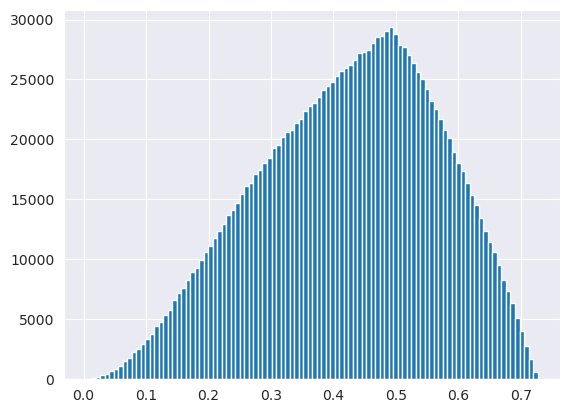

In [15]:
import matplotlib.pyplot as plt

plt.hist(result["AVI"].to_list(), bins=100)




In [ ]:
b